# Exemplo de Visão Computacional
Analisar um cenário onde podemos reconhecer diferentes peças de roupa, com base em um conjunto de dados contendo 10 tipos diferentes.

 ## TensorFlow
Para cada neuronio "por baixo dos panos" ele cria 128 núcleos (células de processamento). Para cada um desses 128 neurônios, ele cria automaticamente uma lista de pesos ($W$) e um bias ($b$). Ele já deixa a fórmula $z = (W \cdot X) + b$ pronta dentro de cada um deles. Ele já aplica a função de ativação ReLU no resultado.
TensorFlow biblioteca de alto nível.

In [1]:
# importação do TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


Treinar uma rede neural para reconhecer peças de roupa a partir de um conjunto de dados comum chamado Fashion MNIST.(https://github.com/zalandoresearch/fashion-mnist).

Ele contém 70.000 peças de roupa em 10 categorias diferentes. Cada peça de roupa está em uma imagem em tons de cinza de 28x28 pixels. Você pode ver alguns exemplos aqui:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Os dados do Fashion MNIST estão disponíveis diretamente na API de conjuntos de dados do tf.keras. Você os carrega assim:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#Chamar o método load_data nesse objeto retornará dois conjuntos de duas listas, que serão os valores de treinamento e teste para os gráficos que contêm as peças de roupa e seus respectivos rótulos
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Papel do Programador(training_images[5]):
Faz uma inspeção, abre a "caixa 5" para ter certeza de que o dado é bom. Se você abrisse a caixa e visse um borrão ou uma imagem errada, saberia que o modelo nunca aprenderia direito. É o seu controle de qualidade.

##Papel da IA (model.fit):
Ela não precisa do plt.imshow. Ela "engole" as 60.000 matrizes de números de uma vez. Ela compara cada matriz com o rótulo correspondente e vai ajustando os milhares de pesos ($W$) e bias ($b$) até que a matemática faça sentido para todas as imagens.
No modelo os 128 neurônios da camada oculta começam a se organizar:
Um grupo de neurônios pode se especializar em detectar linhas verticais (mangas).
Outro grupo pode se especializar em detectar o vazio entre as pernas (calças).
A combinação desses sinais é o que faz a IA "concluir" o que é uma camisa.

2
[[0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.08627451 0.34509804 0.7372549
  0.6745098  0.51764706 0.49019608 0.55294118 0.78039216 0.56078431
  0.03529412 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.07843137 0.51372549 0.78039216 0.80784314 0.76862745 0.79215686
  0.94901961 1.         1.         0.98039216 0.87058824 0.77254902
  0.80784314 0.7372549  0.49411765 0.06666667 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.1372549
  0.83921569 0.74901961 0.71764706 0.69803922 0.68627451 0.65882353
  0.58823529 0.63529412 0.62352941 0.59607843 0.61960784 0.70196078
  0.71764706 0.74117647 0.76470588 0.7254902  0.32156863 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.66666667
  0.74509804 0.

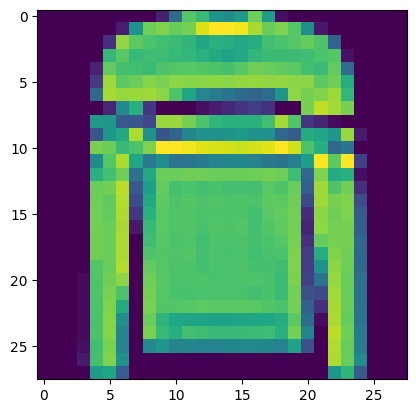

In [13]:
# Imagem de treinamento e um rótulo de treinamento, experimentar com diferentes índices na matriz.
import matplotlib.pyplot as plt
plt.imshow(training_images[5])
print(training_labels[5])#NUMERO REFERENCIA DO CALCADO ESPECIFICO
print(training_images[5]) #MATRIZ DE PIXEL DE UM CALCADO ESPECIFICO

# Img em numeros/Intensidade de pixel = 0 espaço vazio(preto) / 255 parte da roupa(branco/cinza claro)

Você vai notar que todos os valores no número estão entre 0 e 255. Se estivermos treinando uma rede neural, por vários motivos, é mais fácil tratar todos os valores como estando entre 0 e 1, um processo chamado de '**normalização**' e, felizmente, em Python é fácil normalizar uma lista como essa sem usar um loop.

In [14]:
# Normalizar uma lista sem usar um loop.
# Acurácia de Treino/Acurácia de Teste
training_images  = training_images / 255.0
test_images = test_images / 255.0

Existem dois conjuntos(treinamento e teste)  A ideia é ter um conjunto de dados para treinamento e outro conjunto de dados que o modelo ainda não viu, para ver o quão bem ele se sairia na classificação de valores. Afinal, quando terminar, você vai querer testá-lo com dados que ele nunca viu antes!

In [15]:
#PROJETANDO O MODELO
#Imagine que a foto da pata do cavalo é uma grade. O computador não entende "grade" nativamente é camadas densas.
#Camada Flatten:não tem neurônios, apenas pega a imagem de 28x28 pixels e a "estica" em uma linha de 784 números.
#O Flatten desmancha a grade e coloca todos os pixels em uma fila única.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    #Primeira camada Dense (Oculta): tem 128 neurônios. Cada um desses 128 neurônios,está conectado a todos os 784 pixels da entrada.
                                    #Filtro de importância — ela descarta sinais negativos que não ajudam na detecção de padroes.
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    #Segunda camada Dense (Saída):tem 10 neurônios (um para cada categoria de roupa: bota, camiseta, etc).
                                    #Softmax entrega a resposta em probabilidade (ex: 90% de chance de ser a bota).
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequencial**: Define uma SEQUÊNCIA de camadas na rede neural.

**Aplanar**: Lembra-se de quando nossas imagens eram um quadrado ao serem impressas? Aplanar simplesmente transforma esse quadrado em um conjunto unidimensional.

**Denso**: Adiciona uma camada de neurônios. É o modelo do neurônio. Quando você chama Dense, você está dizendo: "Quero aquele neurônio clássico que o professor me ensinou nos fundamentos (que faz soma ponderada e ativação)".

O parâmetro 128: É a quantidade. Você está encomendando 128 unidades desse modelo de neurônio.

A activation: É a configuração interna. Você está dizendo que cada um desses 128 neurônios deve vir de fábrica com uma "válvula" ReLU instalada na saída.
Cada camada de neurônios precisa de uma **função de ativação** para instruí-los sobre o que fazer.

**ReLU** significa, efetivamente, "Se X > 0, retorne X; caso contrário, retorne 0" — ou seja, ela passa apenas valores iguais ou maiores que 0 para a próxima camada da rede.

** **Softmax** pega um conjunto de valores e escolhe o maior deles. Por exemplo, se a saída da última camada for [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], ela evita que você precise procurar o maior valor, transformando-o em [0,0,0,0,1,0,0,0,0] — o objetivo é economizar bastante código!

O próximo passo, agora que o modelo está definido, é construí-lo. Isso é feito compilando-o com um otimizador e uma função de perda, como antes, e então treinando-o ao chamar o método `model.fit`, solicitando que ele ajuste os dados de treinamento aos rótulos de treinamento — ou seja, que determine a relação entre os dados de treinamento e seus rótulos reais. Assim, no futuro, se você tiver dados semelhantes aos dados de treinamento, o modelo poderá prever como esses dados se comportarão.

In [16]:
# Compila com um otimizador e funcao de perda loss
# 1 epoca - todas as imagens analisadas
# Loss(perda) - diminui conforma epocas
# Acuracia(precisão) - aumenta conforma epocas
# Adam - versão "turbinada" do Gradiente Descendente.
# Enquanto o GD comum desce a montanha em passos constantes, o Adam ajusta a velocidade da descida para cada peso individualmente (ele tem "memória").
# Quando ele age? Toda vez que o model.fit processa um lote de imagens, o Adam calcula o erro (Loss), vê para que lado a montanha desce (Gradiente) e empurra os pesos naquela direção.
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

# ACURACIA E LOSS são a média de erro e acerto sobre as 60.000 imagens simultaneamente.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5574 - loss: 1.4770
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7607 - loss: 0.6618
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7968 - loss: 0.5693
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8140 - loss: 0.5288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8247 - loss: 0.4923


Após o treinamento, você deverá ver um valor de ACÚRACIA ao final da última época. Pode ser algo como 0,9098. Isso indica que sua rede neural tem uma acurácia de aproximadamente 91% na classificação dos dados de treinamento. Ou seja, ela identificou uma correspondência de padrão entre a imagem e os rótulos em 91% dos casos. Não é ótimo, mas também não é ruim considerando que o treinamento durou apenas 5 épocas e foi concluído rapidamente.

Mas como ela se comportaria com dados não vistos? É por isso que temos as imagens de teste. Podemos chamar o método `model.evaluate`, passando os dois conjuntos de dados, e ele retornará a perda para cada um. Vamos experimentar:

In [8]:
# GENERALIZAÇÃO - capacidade do modelo de manter um desempenho alto em dados que ele nunca viu.
# Acurácia de Treino: O quanto ele aprendeu com os exemplos que viu.
# Acurácia de Teste (Evaluate): O quanto ele aprendeu o conceito geral.
# ve a perda entre acuracia de treino e de teste
# O QUE SERA PRECISO: modelo aprenda o movimento da pata e não apenas decore o fundo da fazenda ou a cor de um cavalo específico. Generalização.
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3559


[0.3522093892097473, 0.8736000061035156]

Para mim, isso resultou em uma precisão de aproximadamente 0,8838, o que significa uma acurácia de cerca de 88%. Como esperado, provavelmente não teria o mesmo desempenho com dados *não vistos* que teve com os dados usados ​​no treinamento! Ao longo deste curso, você verá maneiras de melhorar isso.
